<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/Romanov-Sergey-branch/Romanov%20Sergey/%C2%B0%C2%B0%C2%B0_20_09_2023_%7C_%D0%A0%D0%B0%D0%B1%D0%BE%D1%87%D0%B0%D1%8F_%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D1%8C_%7C_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D0%BE%D0%B2_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%7C_%D0%9C%D0%90%D0%A0%D0%9A%D0%95%D0%A2%D0%9F%D0%9B%D0%AD%D0%99%D0%A1%D0%AB_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


►►► Задание: Подбор гиперпараметров, исключение колонок, мало влияющих на предсказание. Решение 1 из 3 задач от заказчика

[Три модели под эксперементы](https://docs.google.com/spreadsheets/d/1O_llHdPiwXT9gl0vlKjOXZJdcb2tR00k/edit#gid=1825022768)

[Маркетплейсы](https://docs.google.com/spreadsheets/d/1anlmyl9JXnhtZ5_14q5-pdLDi38PmR08/edit#gid=28373718)

In [4]:
### Ячейка для библиотек
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел
#import math # Для округления
import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline
import pickle #реализует мощный алгоритм сериализации и десериализации объектов Python, сохранение датафрейма в файл

from IPython.display import clear_output

import glob #для поиска CSV файлов

In [5]:
# Подключаем диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_all_merge_6_olders = pd.read_excel('/content/drive/MyDrive/Marketplaces/df_all_merge_6_olders.xlsx')

In [7]:
df_all_merge_6_olders.head()

,День,Ozon ID,Артикул,Название товара,Категория MPStats неделя,Категория MPStats Продавцы,Категория Ozon Графики,Медиан. цена,Количество товаров с остатком (недельные данные),Средний чек,...,Продаж в категории FBO,Оборот категории Ozon FBO,Доля в категории FBO,Продаж в категории FBS,Оборот категории Ozon FBS,Доля в категории FBS,Продаж в категории Retail,Оборот категории Ozon Retail,Доля в категории Retail,Оборот (целевой)
0,2022-06-01,260957663,24761,Ксеноновая лампа D1S OSRAM 66140CLC Xenarc Cla...,0,0,Лампа автомобильная,0,0,0.0,...,5546,5775772,0,4553,8616309,0,1381,428870,0,0
1,2022-06-01,275493676,29276,Светодиодные линзы Aozoom A3+ RU (комплект),0,Автотовары/Автозапчасти/Автосвет/Фары,Фара автомобильная,10900,6,0.0,...,5546,5775772,0,4553,8616309,0,1381,428870,0,0
2,2022-06-01,275500058,30741,Светодиодные линзы Aozoom A7 (комплект),0,Автотовары/Автозапчасти/Автосвет/Фары,Фара автомобильная,14900,6,0.0,...,5546,5775772,0,4553,8616309,0,1381,428870,0,0
3,2022-06-01,276736911,28907,Лампа газоразрядная MTF Light DxS (D1S/D2S/D3S...,0,Автотовары/Автозапчасти/Автосвет/Автолампы,Лампа автомобильная,0,0,0.0,...,5546,5775772,0,4553,8616309,0,1381,428870,0,0
4,2022-06-01,276737362,28908,Ксеноновая лампа MTF light DxS 5000K универсал...,0,Автотовары/Автозапчасти/Автосвет/Автолампы,Лампа автомобильная,5500,7,0.0,...,5546,5775772,0,4553,8616309,0,1381,428870,0,0


In [5]:
df_all_merge_6_olders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254052 entries, 0 to 254051
Data columns (total 43 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   День                                              254052 non-null  object 
 1   Ozon ID                                           254052 non-null  int64  
 2   Артикул                                           254052 non-null  object 
 3   Название товара                                   254052 non-null  object 
 4   Категория MPStats неделя                          254052 non-null  object 
 5   Категория MPStats Продавцы                        254052 non-null  object 
 6   Категория Ozon Графики                            254052 non-null  object 
 7   Медиан. цена                                      254052 non-null  int64  
 8   Количество товаров с остатком (недельные данные)  254052 non-null  int64  
 9   Сред

In [8]:
df_mps = df_all_merge_6_olders.copy()

In [9]:
# анализ содержимого ДатаФрейма
list_data = []
for i in df_mps.columns[7:]:
  data = [i, df_mps[i].min(), df_mps[i].max(), df_mps[i].quantile(0.1), df_mps[i].quantile(0.5), df_mps[i].quantile(0.9)]
  list_data.append(data)


In [10]:
list_data

[['Медиан. цена', 0, 39900, 712.0, 2912.0, 7389.0],
 ['Количество товаров с остатком (недельные данные)', 0, 7, 0.0, 7.0, 7.0],
 ['Средний чек', 0.0, 29900.0, 0.0, 0.0, 0.0],
 ['Показы', 0, 20098, 2.0, 14.0, 151.0],
 ['Посетители', 0, 12798, 2.0, 10.0, 90.0],
 ['Посетители на карточке товара', 0, 838, 0.0, 0.0, 4.0],
 ['В Корзину', 0, 106, 0.0, 0.0, 0.0],
 ['Заказано', 0, 20, 0.0, 0.0, 0.0],
 ['Доставлено', 0, 20, 0.0, 0.0, 0.0],
 ['Отменено', 0, 4, 0.0, 0.0, 0.0],
 ['Возвращено', 0, 2, 0.0, 0.0, 0.0],
 ['Позиция в поиске и каталоге', 0, 4584, 0.0, 87.0, 294.0],
 ['Заказано по Акции', 0, 20, 0.0, 0.0, 0.0],
 ['Заказано на сумму по Акции', 0, 57186, 0.0, 0.0, 0.0],
 ['Трафареты_Охват', 0, 18642, 0.0, 0.0, 10.0],
 ['Трафареты_Количество_заказов', 0, 10, 0.0, 0.0, 0.0],
 ['Трафареты_Сумма_заказов', 0, 19224, 0.0, 0.0, 0.0],
 ['Трафареты_Клики', 0, 229, 0.0, 0.0, 0.0],
 ['Трафареты_Расходы_всего', 0, 523, 0.0, 0.0, 1.0],
 ['Продвижение в поиске. Количество заказов', 0, 9, 0.0, 0.0, 0.0],
 

In [11]:
np_sup= np.array(list_data)
df_sup = pd.DataFrame(np_sup, columns = ['Column', 'min', 'max', '10%', '50%', '90%',])

In [12]:
df_sup

,Column,min,max,10%,50%,90%
0,Медиан. цена,0,39900,712.0,2912.0,7389.0
1,Количество товаров с остатком (недельные данные),0,7,0.0,7.0,7.0
2,Средний чек,0.0,29900.0,0.0,0.0,0.0
3,Показы,0,20098,2.0,14.0,151.0
4,Посетители,0,12798,2.0,10.0,90.0
5,Посетители на карточке товара,0,838,0.0,0.0,4.0
6,В Корзину,0,106,0.0,0.0,0.0
7,Заказано,0,20,0.0,0.0,0.0
8,Доставлено,0,20,0.0,0.0,0.0
9,Отменено,0,4,0.0,0.0,0.0


In [ ]:
df_sup.to_excel('/content/drive/MyDrive/Marketplaces/df_info.xlsx') #сохраняю в exele, чтобы добавить комментарии.

In [ ]:
df_info = pd.read_excel('/content/drive/MyDrive/Marketplaces/df_info.xlsx') #выгружаю таблицу с комметариями

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format #для отображения значений ДатаФрейма в обычном вормате, а не экпонециальной записью.

In [ ]:
df_info

,Unnamed: 0,Column,min,max,10%,50%,90%,Unnamed: 7
0,0,Медиан. цена,0.00,"39,900.00",712.00,"2,912.00","7,389.00","Оставляем, требуется нормализация"
1,1,Количество товаров с остатком (недельные данные),0.00,7.00,0.00,7.00,7.00,"Перевести в 1 или 0, где 1 - есть товар с оста..."
2,2,Средний чек,0.00,"29,900.00",0.00,0.00,0.00,"Убираем, малая информативность. 90% значений с..."
3,3,Показы,0.00,"20,098.00",2.00,14.00,151.00,"Оставляем, требуется нормализация"
4,4,Посетители,0.00,"12,798.00",2.00,10.00,90.00,"Оставляем, требуется нормализация"
5,5,Посетители на карточке товара,0.00,838.00,0.00,0.00,4.00,"Перевести в 1 или 0, где 1 - были посетители, ..."
6,6,В Корзину,0.00,106.00,0.00,0.00,0.00,"Убираем, малая информативность. 90% значений с..."
7,7,Заказано,0.00,20.00,0.00,0.00,0.00,"Убираем, малая информативность. 90% значений с..."
8,8,Доставлено,0.00,20.00,0.00,0.00,0.00,"Убираем, малая информативность. 90% значений с..."
9,9,Отменено,0.00,4.00,0.00,0.00,0.00,"Убираем, малая информативность. 90% значений с..."


In [13]:
# лист удаляемых столбцов
drop_list = [
    'День',
    'Ozon ID',
    'Артикул',
    'Название товара',
    'Категория MPStats неделя',
    'Категория MPStats Продавцы',
    'Категория Ozon Графики',
    'Средний чек',
    'В Корзину',
    'В Корзину',
    'Заказано',
    'Доставлено',
    'Отменено',
    'Возвращено',
    'Заказано по Акции',
    'Заказано на сумму по Акции',
    'Трафареты_Охват',
    'Трафареты_Количество_заказов',
    'Трафареты_Сумма_заказов',
    'Трафареты_Клики',
    'Продвижение в поиске. Количество заказов',
    'Продвижение в поиске. Сумма заказов',
    'Продвижение в поиске. Ставка',
    'Доля в категории FBO',
    'Доля в категории FBS',
    'Доля в категории Retail'
    ]

In [14]:
df_train = df_mps.drop(drop_list, axis = 1)

In [15]:
print(df_train.columns)
print(len(df_train.columns))

Index(['Медиан. цена', 'Количество товаров с остатком (недельные данные)',
       'Показы', 'Посетители', 'Посетители на карточке товара',
       'Позиция в поиске и каталоге', 'Трафареты_Расходы_всего',
       'SKU в категории', 'Названий в категории', 'Брендов в категории',
       'Продавцов в категории', 'Продаж в категории FBO',
       'Оборот категории Ozon FBO', 'Продаж в категории FBS',
       'Оборот категории Ozon FBS', 'Продаж в категории Retail',
       'Оборот категории Ozon Retail', 'Оборот (целевой)'],
      dtype='object')
18


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254052 entries, 0 to 254051
Data columns (total 18 columns):
 #   Column                                            Non-Null Count   Dtype
---  ------                                            --------------   -----
 0   Медиан. цена                                      254052 non-null  int64
 1   Количество товаров с остатком (недельные данные)  254052 non-null  int64
 2   Показы                                            254052 non-null  int64
 3   Посетители                                        254052 non-null  int64
 4   Посетители на карточке товара                     254052 non-null  int64
 5   Позиция в поиске и каталоге                       254052 non-null  int64
 6   Трафареты_Расходы_всего                           254052 non-null  int64
 7   SKU в категории                                   254052 non-null  int64
 8   Названий в категории                              254052 non-null  int64
 9   Брендов в категории       

Epoch 1/10
12703/12703 - 31s - loss: 1223298.5000 - mae: 175.4695 - val_loss: 1321437.0000 - val_mae: 300.0227 - 31s/epoch - 2ms/step
Epoch 2/10
12703/12703 - 30s - loss: 1202256.2500 - mae: 176.2335 - val_loss: 1705787.1250 - val_mae: 345.2610 - 30s/epoch - 2ms/step
Epoch 3/10
12703/12703 - 29s - loss: 1198892.7500 - mae: 177.5361 - val_loss: 3242659.7500 - val_mae: 358.9477 - 29s/epoch - 2ms/step
Epoch 4/10
12703/12703 - 29s - loss: 1188369.7500 - mae: 175.3974 - val_loss: 4359508.0000 - val_mae: 415.4702 - 29s/epoch - 2ms/step
Epoch 5/10
12703/12703 - 30s - loss: 1188383.1250 - mae: 174.7518 - val_loss: 2563057.2500 - val_mae: 329.8089 - 30s/epoch - 2ms/step
Epoch 6/10
12703/12703 - 29s - loss: 1187089.1250 - mae: 175.0305 - val_loss: 2655279.5000 - val_mae: 369.8861 - 29s/epoch - 2ms/step
Epoch 7/10
12703/12703 - 32s - loss: 1192068.7500 - mae: 174.3423 - val_loss: 4385453.0000 - val_mae: 383.4618 - 32s/epoch - 3ms/step
Epoch 8/10
12703/12703 - 30s - loss: 1181887.2500 - mae: 173.6

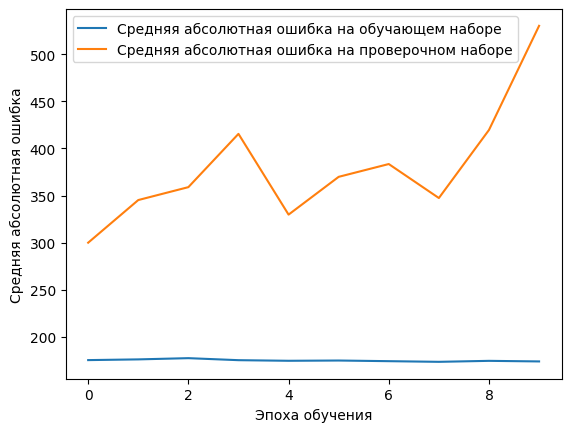

In [ ]:
# Модель на данных без нулей, но без праметризации
model = Sequential()
model.add(BatchNormalization(input_shape=(16,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(df_train.iloc[:,1:-1],
                    df_train.iloc[:,-1],
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=2)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254052 entries, 0 to 254051
Data columns (total 18 columns):
 #   Column                                            Non-Null Count   Dtype
---  ------                                            --------------   -----
 0   Медиан. цена                                      254052 non-null  int64
 1   Количество товаров с остатком (недельные данные)  254052 non-null  int64
 2   Показы                                            254052 non-null  int64
 3   Посетители                                        254052 non-null  int64
 4   Посетители на карточке товара                     254052 non-null  int64
 5   Позиция в поиске и каталоге                       254052 non-null  int64
 6   Трафареты_Расходы_всего                           254052 non-null  int64
 7   SKU в категории                                   254052 non-null  int64
 8   Названий в категории                              254052 non-null  int64
 9   Брендов в категории       

In [17]:
yTrain = df_train.iloc[:,-1].values
xTrain = df_train.iloc[:,1:-1].values

In [18]:
print(yTrain.shape)
print(xTrain.shape)

(254052,)
(254052, 16)


In [19]:
# Нормализация правильных ответов
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(yTrain.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))

print(yTrainScaled.shape)
print('Максимальный и минимальный оборот до нормализации: ', min(yTrain), max(yTrain))
print('Максимальный и минимальный оборот после нормализации: ',min(yTrainScaled), max(yTrainScaled))

(254052, 1)
Максимальный и минимальный оборот до нормализации:  0 101526
Максимальный и минимальный оборот после нормализации:  [-0.10717637] [87.88724945]


Epoch 1/10
12703/12703 - 32s - loss: 0.9245 - mae: 0.1675 - val_loss: 1.0226 - val_mae: 0.2116 - 32s/epoch - 3ms/step
Epoch 2/10
12703/12703 - 30s - loss: 0.9054 - mae: 0.1662 - val_loss: 1.2385 - val_mae: 0.2719 - 30s/epoch - 2ms/step
Epoch 3/10
12703/12703 - 34s - loss: 0.9009 - mae: 0.1649 - val_loss: 2.6805 - val_mae: 0.3022 - 34s/epoch - 3ms/step
Epoch 4/10
12703/12703 - 30s - loss: 0.8990 - mae: 0.1650 - val_loss: 2.4077 - val_mae: 0.2754 - 30s/epoch - 2ms/step
Epoch 5/10
12703/12703 - 30s - loss: 0.9023 - mae: 0.1695 - val_loss: 2.1980 - val_mae: 0.3015 - 30s/epoch - 2ms/step
Epoch 6/10
12703/12703 - 31s - loss: 0.8957 - mae: 0.1707 - val_loss: 2.9557 - val_mae: 0.3053 - 31s/epoch - 2ms/step
Epoch 7/10
12703/12703 - 30s - loss: 0.8936 - mae: 0.1730 - val_loss: 7.8316 - val_mae: 0.4472 - 30s/epoch - 2ms/step
Epoch 8/10
12703/12703 - 29s - loss: 0.8981 - mae: 0.1738 - val_loss: 2.7388 - val_mae: 0.3141 - 29s/epoch - 2ms/step
Epoch 9/10
12703/12703 - 29s - loss: 0.8932 - mae: 0.174

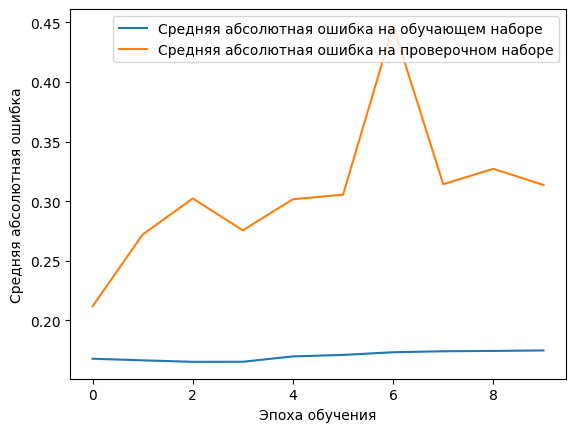

In [ ]:
# Модель на данных без нулей, с нормализованными ответами, но непараметризированными входными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(16,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(xTrain,
                    yTrainScaled,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=2)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [20]:
df_train_parameter = df_train.iloc[:,:-1]

In [21]:
df_train_parameter.columns

Index(['Медиан. цена', 'Количество товаров с остатком (недельные данные)',
       'Показы', 'Посетители', 'Посетители на карточке товара',
       'Позиция в поиске и каталоге', 'Трафареты_Расходы_всего',
       'SKU в категории', 'Названий в категории', 'Брендов в категории',
       'Продавцов в категории', 'Продаж в категории FBO',
       'Оборот категории Ozon FBO', 'Продаж в категории FBS',
       'Оборот категории Ozon FBS', 'Продаж в категории Retail',
       'Оборот категории Ozon Retail'],
      dtype='object')

In [22]:
list_to_binary = ['Количество товаров с остатком (недельные данные)', 'Посетители на карточке товара', 'Трафареты_Расходы_всего']

In [23]:
def values_to_binary (in_series): # функция для перевода значения в параметр 1 или 0
  out_series = []
  for i in in_series:
    if (i > 0):
      out_series.append(1)
    else:
      out_series.append(0)
  return out_series

In [24]:
df_train_parameter['Количество товаров с остатком (недельные данные)'] = values_to_binary(df_train_parameter['Количество товаров с остатком (недельные данные)'])

<ipython-input-24-b85f5905e72d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_parameter['Количество товаров с остатком (недельные данные)'] = values_to_binary(df_train_parameter['Количество товаров с остатком (недельные данные)'])


In [25]:
df_train_parameter['Посетители на карточке товара']= values_to_binary(df_train_parameter['Посетители на карточке товара'])

<ipython-input-25-c72a646c9def>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_parameter['Посетители на карточке товара']= values_to_binary(df_train_parameter['Посетители на карточке товара'])


In [26]:
df_train_parameter['Трафареты_Расходы_всего']= values_to_binary(df_train_parameter['Трафареты_Расходы_всего'])

<ipython-input-26-4f2c561324f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_parameter['Трафареты_Расходы_всего']= values_to_binary(df_train_parameter['Трафареты_Расходы_всего'])


In [27]:
def StandartSk (in_series):
  in_arr = in_series.values
  yScalerSup = StandardScaler()
  yScalerSup.fit(in_arr.reshape(-1, 1))
  out_arr = yScalerSup.transform(in_arr.reshape(-1, 1))
  return out_arr

In [28]:
df_train_parameter['Медиан. цена']= StandartSk(df_train_parameter['Медиан. цена'])

<ipython-input-28-8e85e034636f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_parameter['Медиан. цена']= StandartSk(df_train_parameter['Медиан. цена'])


In [29]:
# список столбцов для стандартизации
list_for_StandartSk = [
    'Количество товаров с остатком (недельные данные)',
    'Показы',
    'Посетители',
    'Позиция в поиске и каталоге',
    'Названий в категории',
    'Брендов в категории',
    'Продавцов в категории',
    'Продаж в категории FBO',
    'Оборот категории Ozon FBO',
    'Продаж в категории FBS',
    'Оборот категории Ozon FBS',
    'Продаж в категории Retail',
    'Оборот категории Ozon Retail'
]

In [30]:
for i in list_for_StandartSk:
  df_train_parameter[i]= StandartSk(df_train_parameter[i])

<ipython-input-30-7d140996968f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_parameter[i]= StandartSk(df_train_parameter[i])
<ipython-input-30-7d140996968f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_parameter[i]= StandartSk(df_train_parameter[i])
<ipython-input-30-7d140996968f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [31]:
for i in df_train_parameter.columns:
  print(i, df_train_parameter[i].min(), df_train_parameter[i].max())

Медиан. цена -1.0095903375013895 10.12728309773073
Количество товаров с остатком (недельные данные) -2.8196693978133416 0.35465150658282896
Показы -0.21137536840073473 47.99266104483557
Посетители -0.2256885364061814 57.79315331706057
Посетители на карточке товара 0 1
Позиция в поиске и каталоге -0.7249505453652603 24.205148408302133
Трафареты_Расходы_всего 0 1
SKU в категории 0 54980
Названий в категории -0.9873281600468594 5.8878209725663035
Брендов в категории -1.2329091406780146 4.536508020852779
Продавцов в категории -1.0335158082661067 4.409107103424385
Продаж в категории FBO -0.953968902726828 5.167165502725558
Оборот категории Ozon FBO -0.627503232412202 8.31122106101358
Продаж в категории FBS -0.6213457960965425 3.3523108923955207
Оборот категории Ozon FBS -0.6024507241917635 3.904874870732375
Продаж в категории Retail -0.414408301518883 7.285682945450893
Оборот категории Ozon Retail -0.3432311561564258 9.770588567777484


Epoch 1/10
12703/12703 - 37s - loss: 0.9157 - mae: 0.1720 - val_loss: 1.1397 - val_mae: 0.2758 - 37s/epoch - 3ms/step
Epoch 2/10
12703/12703 - 33s - loss: 0.8917 - mae: 0.1719 - val_loss: 1.1427 - val_mae: 0.3248 - 33s/epoch - 3ms/step
Epoch 3/10
12703/12703 - 38s - loss: 0.8883 - mae: 0.1722 - val_loss: 8.8857 - val_mae: 0.4039 - 38s/epoch - 3ms/step
Epoch 4/10
12703/12703 - 33s - loss: 0.8800 - mae: 0.1756 - val_loss: 5.8948 - val_mae: 0.3755 - 33s/epoch - 3ms/step
Epoch 5/10
12703/12703 - 33s - loss: 0.8662 - mae: 0.1782 - val_loss: 11.9211 - val_mae: 0.4350 - 33s/epoch - 3ms/step
Epoch 6/10
12703/12703 - 37s - loss: 0.8760 - mae: 0.1816 - val_loss: 9.8781 - val_mae: 0.4854 - 37s/epoch - 3ms/step
Epoch 7/10
12703/12703 - 32s - loss: 0.8694 - mae: 0.1816 - val_loss: 19.1189 - val_mae: 0.4915 - 32s/epoch - 2ms/step
Epoch 8/10
12703/12703 - 33s - loss: 0.8734 - mae: 0.1831 - val_loss: 37.5495 - val_mae: 0.6803 - 33s/epoch - 3ms/step
Epoch 9/10
12703/12703 - 32s - loss: 0.8779 - mae: 0.

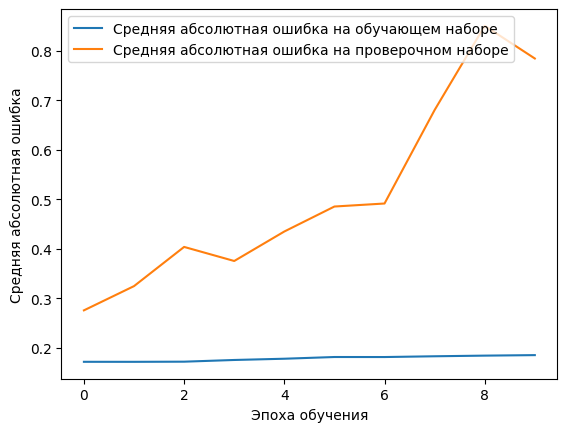

In [ ]:
# Модель на данных без нулей, с нормализованными ответами, c непараметризированными входными данными, но не параметризированным столбцом SKU
model = Sequential()
model.add(BatchNormalization(input_shape=(17,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(df_train_parameter,
                    yTrainScaled,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=2)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [32]:
uniq_SKU = df_train_parameter['SKU в категории'].unique()

In [33]:
print(uniq_SKU)
print(len(uniq_SKU))

[    0 22776 22627 16213  4026  1200 38675 54980  4815 17761   298 44233
 52853  6143  5648  1115 36039 43092 18402  7139 34480 16349]
22


In [34]:
SKU_OHE = []
for i in df_train_parameter['SKU в категории']:
  if (i == uniq_SKU[0]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[1]):
    SKU_OHE.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[2]):
    SKU_OHE.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[3]):
    SKU_OHE.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[4]):
    SKU_OHE.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[5]):
    SKU_OHE.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[6]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[7]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[8]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[9]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[10]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[11]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[12]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[13]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[14]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[15]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[16]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
  elif (i == uniq_SKU[17]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
  elif (i == uniq_SKU[18]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
  elif (i == uniq_SKU[19]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
  elif (i == uniq_SKU[20]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
  elif (i == uniq_SKU[21]):
    SKU_OHE.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [35]:
print(len(SKU_OHE))

254052


In [36]:
df_train_parameter[list_to_binary].values[0].shape

(3,)

In [37]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления
#import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output

In [38]:
Std = df_train_parameter[list_for_StandartSk].values
Binar = df_train_parameter[list_to_binary].values
SKU_OHE = np.array(SKU_OHE)

In [41]:
input1 = Input((Std[0].shape),)
input2 = Input((Binar[0].shape),)
input3 = Input((SKU_OHE[0].shape),)

x1 = BatchNormalization()(input1) # Создаем ветку х1 для данных столбцов с количественными данными
#x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation = "relu")(x1)

#x2 = BatchNormalization()(input2) # Создаем ветку х2 для данных столбцов в формате 0 или 1
x2 = Dense(25, activation="relu")(input2)
x2 = Dense(8, activation="relu")(x2)
x2 = Dense(5, activation = "relu")(x2)

#x3 = BatchNormalization()(input3) # Создаем ветку х3 для данных OHE
x3 = Dense(1000, activation="tanh")(input3)
x3 = Dense(20, activation = "elu")(x3)
x3 = Dense(5, activation = "elu")(x3)

x = concatenate([x1, x2, x3]) # Объединяем все три ветки

x = Dense(15, activation='relu')(x)
#x = Dropout(0.5)(x)
x = Dense(1, activation='relu')(x) # Финальный нейрон, делает регрессию

model = Model((input1, input2, input3), x) # В Model загружаем стартовые и последнюю точки

model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])


history = model.fit([Std[:200000], Binar[:200000], SKU_OHE[:200000]],
                    yTrainScaled[:200000],
                    epochs= 5,
                    validation_data=([Std[200000:], Binar[200000:], SKU_OHE[200000:]],
                    yTrainScaled[200000:]),
                    verbose=2, shuffle=True)

Epoch 1/5
6250/6250 - 38s - loss: 0.9413 - mae: 0.2155 - val_loss: 1.0793 - val_mae: 0.2955 - 38s/epoch - 6ms/step
Epoch 2/5
6250/6250 - 32s - loss: 0.9236 - mae: 0.2245 - val_loss: 1.0926 - val_mae: 0.2962 - 32s/epoch - 5ms/step
Epoch 3/5
6250/6250 - 33s - loss: 0.9209 - mae: 0.2215 - val_loss: 1.1319 - val_mae: 0.3079 - 33s/epoch - 5ms/step
Epoch 4/5
6250/6250 - 31s - loss: 0.9187 - mae: 0.2210 - val_loss: 1.1237 - val_mae: 0.3000 - 31s/epoch - 5ms/step
Epoch 5/5
6250/6250 - 31s - loss: 0.9163 - mae: 0.2182 - val_loss: 1.1064 - val_mae: 0.3030 - 31s/epoch - 5ms/step


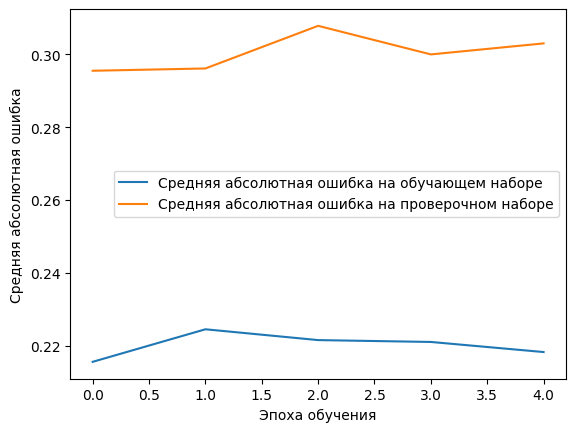

In [42]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [49]:
input1 = Input((Std[0].shape),)
input2 = Input((Binar[0].shape),)
input3 = Input((SKU_OHE[0].shape),)

x1 = BatchNormalization()(input1) # Создаем ветку х1 для данных столбцов с количественными данными
#x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation = "relu")(x1)

#x2 = BatchNormalization()(input2) # Создаем ветку х2 для данных столбцов в формате 0 или 1
x2 = Dense(25, activation="relu")(input2)
x2 = Dense(8, activation="relu")(x2)
x2 = Dense(5, activation = "relu")(x2)

#x3 = BatchNormalization()(input3) # Создаем ветку х3 для данных OHE
x3 = Dense(1000, activation="tanh")(input3)
x3 = Dense(20, activation = "elu")(x3)
x3 = Dense(5, activation = "elu")(x3)

x = concatenate([x1, x2, x3]) # Объединяем все три ветки

x = Dense(15, activation='relu')(x)
#x = Dropout(0.5)(x)
x = Dense(1, activation='relu')(x) # Финальный нейрон, делает регрессию

model = Model((input1, input2, input3), x) # В Model загружаем стартовые и последнюю точки


model.compile (optimizer=Adadelta(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model.fit([Std[:200000], Binar[:200000], SKU_OHE[:200000]],
                    yTrainScaled[:200000],
                    epochs= 20,
                    validation_data=([Std[200000:], Binar[200000:], SKU_OHE[200000:]],
                    yTrainScaled[200000:]),
                    verbose=2, shuffle=True)

Epoch 1/20
6250/6250 - 35s - loss: 0.9752 - mae: 0.2101 - val_loss: 1.1226 - val_mae: 0.4066 - 35s/epoch - 6ms/step
Epoch 2/20
6250/6250 - 30s - loss: 0.9749 - mae: 0.2090 - val_loss: 1.1206 - val_mae: 0.3999 - 30s/epoch - 5ms/step
Epoch 3/20
6250/6250 - 32s - loss: 0.9745 - mae: 0.2080 - val_loss: 1.1177 - val_mae: 0.3921 - 32s/epoch - 5ms/step
Epoch 4/20
6250/6250 - 31s - loss: 0.9743 - mae: 0.2072 - val_loss: 1.1196 - val_mae: 0.3892 - 31s/epoch - 5ms/step
Epoch 5/20
6250/6250 - 32s - loss: 0.9739 - mae: 0.2063 - val_loss: 1.1170 - val_mae: 0.3807 - 32s/epoch - 5ms/step
Epoch 6/20
6250/6250 - 31s - loss: 0.9738 - mae: 0.2054 - val_loss: 1.1138 - val_mae: 0.3776 - 31s/epoch - 5ms/step
Epoch 7/20
6250/6250 - 31s - loss: 0.9734 - mae: 0.2047 - val_loss: 1.1146 - val_mae: 0.3746 - 31s/epoch - 5ms/step
Epoch 8/20
6250/6250 - 69s - loss: 0.9731 - mae: 0.2039 - val_loss: 1.1117 - val_mae: 0.3644 - 69s/epoch - 11ms/step
Epoch 9/20
6250/6250 - 32s - loss: 0.9730 - mae: 0.2032 - val_loss: 1.1

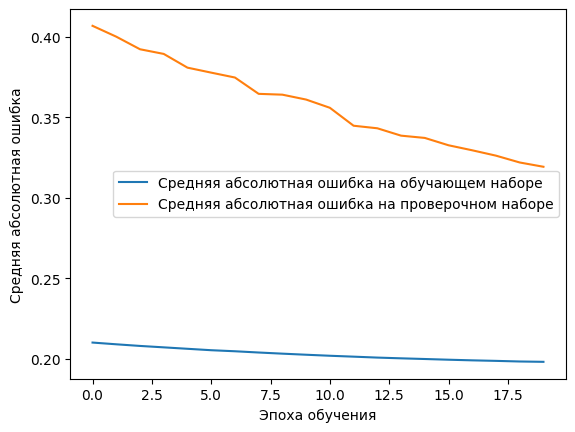

In [50]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()